In [58]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import glob

In [59]:
df_fertility = pd.read_excel("fertility_years.xls")
df_fertility.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820,4.655,4.471,4.271,4.059,3.842,...,1.764,1.769,1.776,1.783,1.791,1.796,1.800,1.801,1.800,NaN
1,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.450,7.450,7.450,7.450,7.450,7.450,...,6.254,6.038,5.816,5.595,5.380,5.174,4.981,4.802,4.635,NaN
2,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.478,7.524,7.563,7.592,7.611,7.619,...,6.307,6.238,6.162,6.082,6.000,5.920,5.841,5.766,5.694,NaN
3,Albania,ALB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.489,6.401,6.282,6.133,5.960,5.773,...,1.650,1.646,1.653,1.668,1.685,1.700,1.710,1.714,1.713,NaN
4,Andorra,AND,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.250,1.190,1.270,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
df_china = df_fertility[df_fertility['Country Name'] == 'China']

In [61]:
df_china.drop(columns=['Country Code', 'Indicator Name','Indicator Code'], inplace=True)

/Users/siruizhu/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [62]:
df_china

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
38,China,5.748,5.919,6.089,6.237,6.346,6.396,6.375,6.286,6.133,...,1.581,1.586,1.59,1.594,1.599,1.604,1.61,1.617,1.624,NaN


In [63]:
#df_china.set_index('Country Name').T.reset_index().rename(columns={'index': 'year'})

In [64]:
type(df_china)

pandas.core.frame.DataFrame

In [65]:
df_china_transposed = df_china.reset_index().T

In [66]:
df_china_transposed

,0
index,38
Country Name,China
1960,5.748
1961,5.919
1962,6.089
1963,6.237
1964,6.346
1965,6.396
1966,6.375
1967,6.286


In [67]:
df_china_transposed =pd.DataFrame(df_china_transposed)

In [68]:
df_china_transposed.head()

,0
index,38
Country Name,China
1960,5.748
1961,5.919
1962,6.089


In [69]:
type(df_china_transposed)

pandas.core.frame.DataFrame

In [70]:
df_china_transposed.columns = df_china_transposed.iloc[0]
df_china_transposed = df_china_transposed.drop(df_china_transposed.index[0])

In [71]:
df_china_transposed = df_china_transposed.drop(df_china_transposed.index[0])

In [72]:
df_china_transposed.head()

index,38
1960,5.748
1961,5.919
1962,6.089
1963,6.237
1964,6.346


In [73]:
df_china_transposed = df_china_transposed.rename(columns ={'Country Name':'year', 'China':'fertility_rate'}).reset_index()

In [74]:
df_china_transposed.head()

index,index,38
0,1960,5.748
1,1961,5.919
2,1962,6.089
3,1963,6.237
4,1964,6.346


In [75]:
df_china_transposed = df_china_transposed.rename(columns ={'index':'year', '38': 'fertility_rate'})

In [76]:
df_china_transposed.head()

index,year,38
0,1960,5.748
1,1961,5.919
2,1962,6.089
3,1963,6.237
4,1964,6.346


In [77]:
type(df_china_transposed)

pandas.core.frame.DataFrame

In [78]:
df_china_transposed.dtypes

index
year    object
38      object
dtype: object

In [79]:
df_china_transposed['year'] = df_china_transposed.year.astype(int)

In [80]:
df_china_transposed.dtypes

index
year     int64
38      object
dtype: object

In [81]:
type(df_china_transposed)

pandas.core.frame.DataFrame

In [82]:
df_china_transposed = df_china_transposed.rename(columns ={'index':'year', '38': 'fertility_rate'})

In [83]:
#df_china_transposed.year = pd.to_datetime(df_china_transposed['year'])

In [84]:
df_china_transposed.head()

index,year,38
0,1960,5.748
1,1961,5.919
2,1962,6.089
3,1963,6.237
4,1964,6.346


In [85]:
df_china_transposed.head()

index,year,38
0,1960,5.748
1,1961,5.919
2,1962,6.089
3,1963,6.237
4,1964,6.346


In [86]:
df_china_transposed = df_china_transposed.rename(columns={38: 'fertility rate'})

In [87]:
df_china_transposed

index,year,fertility rate
0,1960,5.748
1,1961,5.919
2,1962,6.089
3,1963,6.237
4,1964,6.346
5,1965,6.396
6,1966,6.375
7,1967,6.286
8,1968,6.133
9,1969,5.92


In [88]:
df_china_transposed = df_china_transposed.dropna()
df_china_transposed

index,year,fertility rate
0,1960,5.748
1,1961,5.919
2,1962,6.089
3,1963,6.237
4,1964,6.346
5,1965,6.396
6,1966,6.375
7,1967,6.286
8,1968,6.133
9,1969,5.92


In [89]:
df_china_transposed

index,year,fertility rate
0,1960,5.748
1,1961,5.919
2,1962,6.089
3,1963,6.237
4,1964,6.346
5,1965,6.396
6,1966,6.375
7,1967,6.286
8,1968,6.133
9,1969,5.92


In [90]:
len(df_china_transposed)

57

In [91]:
df_china_small = df_china_transposed.loc[df_china_transposed['year'].isin(range(1960,2016,5))]

In [92]:
df_china_small

index,year,fertility rate
0,1960,5.748
5,1965,6.396
10,1970,5.648
15,1975,3.809
20,1980,2.63
25,1985,2.661
30,1990,2.35
35,1995,1.639
40,2000,1.497
45,2005,1.565


In [93]:
#style
import matplotlib.pyplot as plt
from cycler import cycler
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#F8F7F3',
    'axes.facecolor': '#F8F7F3',
    'font.family': 'Sans serif',
    'font.weight': 'normal',
    'lines.linewidth': 2.5, 
    'lines.marker': 'o',
    'lines.markersize'  : 3,
    'lines.solid_capstyle': 'butt',
    'lines.markeredgewidth'  : 1.0, 
    'lines.solid_joinstyle' : 'miter',
    #'axes.prop_cycle': cycler('color', ['#c04851', '#f1939c', '#ef82a0', '#a8456b', '#66a9c9', '#22a2c3', '#134857']),
    #'axes.prop_cycle': cycler('color', ['#1DACE8', '#EDCB64', '#B5966D', '#DAECED', '#CECD7B', '#76A08A', '#F7B0AA']),
    #'axes.prop_cycle': cycler('color', ['#ffd9e8', '#de95ba', '#7f4a88', '#4a266a', '#e45a84', '#ffacac', '#b80257']),
    'axes.prop_cycle': cycler('color', ['#bb5a5a', '#e79e85', '#eaceb4', '#7288B9', '#F0C595', '#76A08A', '#FDDDA4']),
    'axes.spines.left'   : False,   
    'axes.spines.bottom' : False,
    'axes.spines.top'    : False,
    'axes.spines.right'  : False,
    'axes.linewidth': 0.2,
    'axes.labelsize': 'large',
    'axes.labelpad': 7.0, 
    'ytick.left': False,
    'xtick.bottom' : False,
    'axes.grid': True,
    'text.color': 'black',
    'grid.color': 'grey',
    'grid.alpha': 0.3,
    'grid.linewidth': 0.4,
    'grid.linestyle': '--',
    'legend.loc': 'best',
    'legend.fancybox': True,  
    'ytick.labelsize': 'medium',
    'savefig.facecolor' : '#F8F7F3'
})

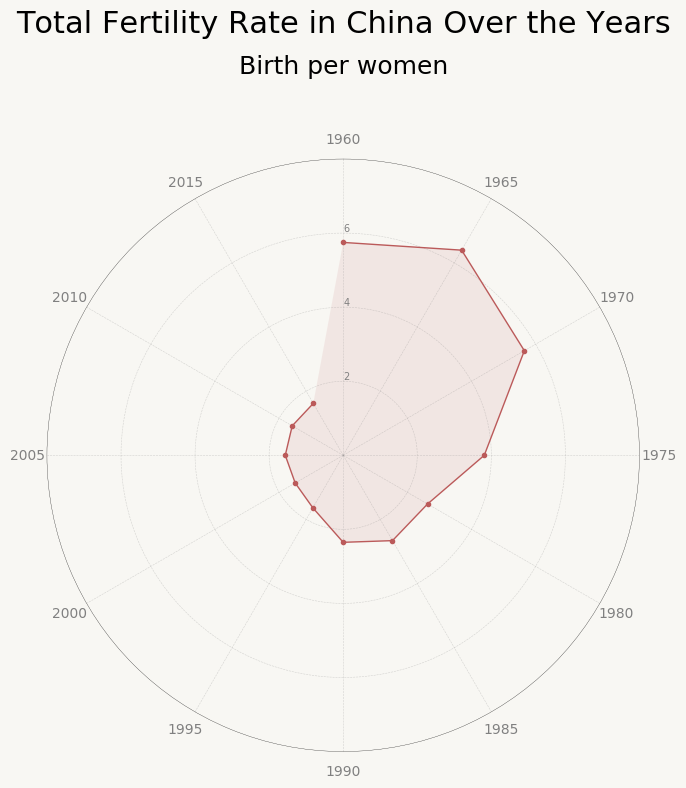

In [97]:
from math import pi
 
# Set data

# number of variable
categories=df_china_small['year']
N = len(categories)  #57
fig = plt.figure(figsize=(8,8))
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df_china_small['fertility rate']
#values += values[:1]
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
#angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
ax.set_title("Total Fertility Rate in China Over the Years", fontsize=22, pad=70, loc ='center')
plt.gcf().text(0.5, 0.9, "Birth per women", ha='center', fontsize=18)

# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:], categories, color='grey', size=10)

 
# Draw ylabels
ax.set_rlabel_position(0)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

plt.yticks([2,4,6],["2","4","6"], color="grey", size=7)
plt.ylim(0,8)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'o', alpha=0.1)


plt.tight_layout()
plt.savefig('output3.pdf')
plt.show()

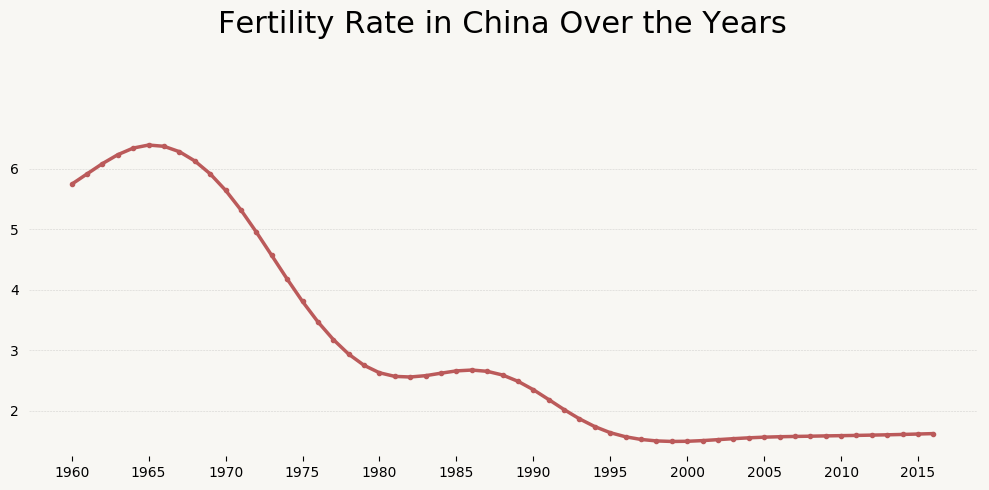

In [53]:
ax = df_china_transposed.plot(x='year',figsize=(10,5))
ax.set_title("Fertility Rate in China Over the Years", fontsize=22, pad=70, loc ='center')
plt.gcf().text(0.5, 0.9, "", ha='center', fontsize=18)
ax.grid(False, axis='x')
ax.set_xticks([1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015])
ax.xaxis.label.set_visible(False)
ax.legend_.remove()
ax.tick_params(which='major', left=False, bottom=True, top=False, grid_alpha=0.3)
ax.yaxis.label.set_visible(False)

plt.tight_layout()
plt.savefig('output2.pdf')
plt.show()